# Μετρικές αξιολόγησης #

## Παλινδρόμηση ##

Δεδομένα που θα χρησιμοποιήσουμε

In [ ]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

Αλγόριθμος που θα χρησιμοποιήσουμε

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

Αξιολόγηση σε ένα σύνολο ελέγχου

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=True)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Υπολογισμός μετρικών

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

print("MAE: {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("RMSE: {:.2f}".format(mean_squared_error(y_test,y_pred) ** (1/2)))
print("R2: {:.2f}".format(r2_score(y_test,y_pred)))
print("MAPE: {:.2f}".format(mean_absolute_percentage_error(y_test,y_pred)))

MAE: 46.17
RMSE: 58.52
R2: 0.33
MAPE: 0.38


## Ταξινόμηση #

Δεδομένα που θα χρησιμοποιήσουμε

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

Αλγόριθμος που θα χρησιμοποιήσουμε

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

Αξιολόγηση με σύνολο ελέγχου.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3, shuffle=True)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Υπολογισμός πίνακα σύγχυσης

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


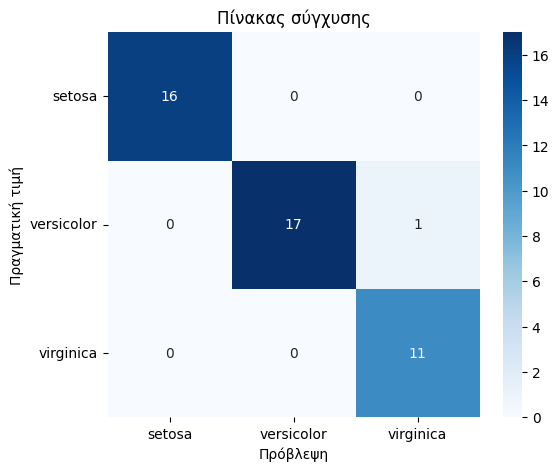

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn

cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(6, 5),
           dpi = 100)
seaborn.heatmap(cm, xticklabels=iris.target_names, yticklabels=iris.target_names, cmap=plt.cm.Blues, annot=True)
plt.title("Πίνακας σύγχυσης")
plt.yticks(rotation=0)
plt.ylabel('Πραγματική τιμή')
plt.xlabel('Πρόβλεψη')

plt.show()

Υπολογισμός μετρικών

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=iris.target_names, digits=3))

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        16
  versicolor      1.000     0.944     0.971        18
   virginica      0.917     1.000     0.957        11

    accuracy                          0.978        45
   macro avg      0.972     0.981     0.976        45
weighted avg      0.980     0.978     0.978        45



In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss

print("Precision: {:.3f}".format(precision_score(y_test,y_pred,average='macro')))
print("Recall: {:.3f}".format(recall_score(y_test,y_pred,average='macro')))
print("F1-Score: {:.3f}".format(f1_score(y_test,y_pred,average='macro')))
print("Accuracy: {:.3f}".format(accuracy_score(y_test,y_pred)))

Precision: 0.972
Recall: 0.981
F1-Score: 0.976
Accuracy: 0.978


In [ ]:
print("   Precision Macro: {:.3f}".format(precision_score(y_test,y_pred,average='macro')))
print("Precision Weighted: {:.3f}".format(precision_score(y_test,y_pred,average='weighted')))
print()
print("   Recall Macro: {:.3f}".format(recall_score(y_test,y_pred,average='macro')))
print("Recall Weighted: {:.3f}".format(recall_score(y_test,y_pred,average='weighted')))
print()
print("   F1-Score Macro: {:.3f}".format(f1_score(y_test,y_pred,average='macro')))
print("F1-Score Weighted: {:.3f}".format(f1_score(y_test,y_pred,average='weighted')))

   Precision Macro: 0.972
Precision Weighted: 0.980

   Recall Macro: 0.981
Recall Weighted: 0.978

   F1-Score Macro: 0.976
F1-Score Weighted: 0.978


# Διαδικασίες αξιολόγησης #

## Χρήση συνόλου επικύρωσης ##

Δεδομένα που θα χρησιμοποιήσουμε

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

Διαχωρισμός σε 60%/20%/20%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train size: ', X_train.shape[0])
print('Validation size: ', X_val.shape[0])
print('Test size: ', X_test.shape[0])

Train size:  90
Validation size:  30
Test size:  30


Εύρεση του βέλτιστου βάθους δένδρου απόφασης

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

for depth in range(1,11):
  model = DecisionTreeClassifier(max_depth=depth, random_state=6)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  print("depth: {:2d}, accuracy: {:.2f}".format(depth, accuracy_score(y_pred, y_val)))

depth:  1, accuracy: 0.67
depth:  2, accuracy: 0.97
depth:  3, accuracy: 1.00
depth:  4, accuracy: 0.97
depth:  5, accuracy: 0.97
depth:  6, accuracy: 0.97
depth:  7, accuracy: 0.97
depth:  8, accuracy: 0.97
depth:  9, accuracy: 0.97
depth: 10, accuracy: 0.97


Εκτίμηση απόδοσης μοντέλου με βέλτιστο βάθος σε άγνωστα δεδομένα

In [ ]:
model = DecisionTreeClassifier(max_depth=3, random_state = 6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("accuracy: {:.2f}".format(accuracy_score(y_pred, y_test)))

accuracy: 0.97


Εκτίμηση απόδοσης μοντέλου με βέλτιστο βάθος σε άγνωστα δεδομένα έπειτα από εκπαίδευση και στο σύνολο επικύρωσης

In [ ]:
import numpy as np

model = DecisionTreeClassifier(max_depth=3, random_state = 6)
model.fit(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)))
y_pred = model.predict(X_test)
print("accuracy: {:.2f}".format(accuracy_score(y_pred, y_test)))

accuracy: 0.97


Διαστρωμάτωση

In [ ]:
print("Χωρίς διαστρωμάτωση")
print(np.unique(y,return_counts=True)[1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train size: ', X_train.shape[0])
print(np.unique(y_train,return_counts=True)[1])
print('Validation size: ', X_val.shape[0])
print(np.unique(y_val,return_counts=True)[1])
print('Test size: ', X_test.shape[0])
print(np.unique(y_test,return_counts=True)[1])

print("\nΜε διαστρωμάτωση")
print(np.unique(y,return_counts=True)[1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, stratify=y_train, test_size=0.25, random_state=1)
print('Train size: ', X_train.shape[0])
print(np.unique(y_train,return_counts=True)[1])
print('Validation size: ', X_val.shape[0])
print(np.unique(y_val,return_counts=True)[1])
print('Test size: ', X_test.shape[0])
print(np.unique(y_test,return_counts=True)[1])

Χωρίς διαστρωμάτωση
[50 50 50]
Train size:  90
[30 27 33]
Validation size:  30
[ 9 10 11]
Test size:  30
[11 13  6]

Με διαστρωμάτωση
[50 50 50]
Train size:  90
[30 30 30]
Validation size:  30
[10 10 10]
Test size:  30
[10 10 10]


## Επαναλαμβανόμενη κράτηση ##

In [ ]:
model = DecisionTreeClassifier(max_depth=3, random_state = 6)

iterations = 10
accuracies = []
for i in range(iterations):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  accuracies.append(accuracy_score(y_test, pred))

print("Accuracies: " + str(accuracies))
avg = np.average(accuracies)
std = np.std(accuracies)
print("Average: {:.2f}\u00B1{:.2f}".format(avg, std))

Accuracies: [0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9, 0.9, 1.0]
Average: 0.95±0.03


## Σταυρωτή επικύρωση ##

Δεδομένα που θα χρησιμοποιήσουμε

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

Σταυρωτή επικύρωση

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
accuracies = []
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model = DecisionTreeClassifier(max_depth=3, random_state=6)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  accuracies.append(accuracy_score(y_test, pred))

print("Accuracies: " + str(accuracies))
avg = np.average(accuracies)
std = np.std(accuracies)
print("Average: {:.2f}\u00B1{:.2f}".format(avg, std))

Accuracies: [1.0, 1.0, 1.0, 1.0, 0.9333333333333333, 0.8, 1.0, 0.8666666666666667, 0.8, 1.0]
Average: 0.94±0.08


In [ ]:
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(max_depth=3, random_state=6)
kf = KFold(n_splits=10)
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
print("Accuracies: " + str(scores))
print("Average: {:.2f}\u00B1{:.2f}".format(scores.mean(), scores.std()))

Accuracies: [1.         1.         1.         1.         0.93333333 0.8
 1.         0.86666667 0.8        1.        ]
Average: 0.94±0.08


Με διαστρωμάτωση

In [ ]:
from sklearn.model_selection import StratifiedKFold

model = DecisionTreeClassifier(max_depth=3, random_state=6)
skf = StratifiedKFold(n_splits=10)
scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
print("Accuracies: " + str(scores))
print("Average: {:.2f}\u00B1{:.2f}".format(scores.mean(), scores.std()))

Accuracies: [1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 1.         1.        ]
Average: 0.96±0.03


Επιλογή μοντέλου

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

for depth in range(1,11):
  skf = StratifiedKFold(n_splits=10)
  model = DecisionTreeClassifier(max_depth=depth, random_state=6)
  accuracies = []
  scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
  print("depth: {:2d}, accuracy: {:.2f}\u00B1{:.2f}".format(depth, scores.mean(), scores.std()))

depth:  1, accuracy: 0.67±0.00
depth:  2, accuracy: 0.95±0.05
depth:  3, accuracy: 0.96±0.03
depth:  4, accuracy: 0.95±0.04
depth:  5, accuracy: 0.95±0.04
depth:  6, accuracy: 0.95±0.04
depth:  7, accuracy: 0.95±0.04
depth:  8, accuracy: 0.95±0.04
depth:  9, accuracy: 0.95±0.04
depth: 10, accuracy: 0.95±0.04


In [ ]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=6)
params = {"max_depth": range(1,11)}
skf = StratifiedKFold(n_splits=10)

gs = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", cv=skf)
gs.fit(X, y)
print(gs.best_params_)

{'max_depth': 3}


In [ ]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=6)
params = {"max_depth": range(1,11), "min_samples_leaf": range(1,11)}
skf = StratifiedKFold(n_splits=10)

gs = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", cv=skf)
gs.fit(X, y)
print(gs.best_params_)

{'max_depth': 3, 'min_samples_leaf': 3}


Επιλογή και εκτίμηση

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

model = DecisionTreeClassifier(random_state=6)
params = {"max_depth": range(1,11)}

inner_cv = StratifiedKFold(n_splits=9, shuffle=True, random_state=6)
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=6)
accuracies = []
max_depths = []
for train_index, test_index in outer_cv.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  gs = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", cv=inner_cv)
  gs.fit(X_train, y_train)
  max_depths.append(gs.best_params_['max_depth'])
  pred = gs.predict(X_test)
  accuracies.append(accuracy_score(y_test,pred))

print("Max depths: " + str(max_depths))
print("Accuracies: " + str(accuracies))
avg = np.average(accuracies)
std = np.std(accuracies)
print("Average: {:.2f}\u00B1{:.2f}".format(avg, std))

Max depths: [4, 3, 6, 2, 5, 3, 6, 5, 6, 6]
Accuracies: [1.0, 0.8, 1.0, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 1.0, 1.0]
Average: 0.95±0.06


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

model = DecisionTreeClassifier(random_state=6)
params = {"max_depth": range(1,11)}

inner_cv = StratifiedKFold(n_splits=9, shuffle=True, random_state=6)
gs = GridSearchCV(estimator=model, param_grid=params, cv=inner_cv, scoring='accuracy')

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=6)
scores = cross_val_score(gs, X, y, cv=outer_cv, scoring='accuracy')

print("Accuracies: " + str(scores))
print("Average: {:.2f}\u00B1{:.2f}".format(scores.mean(), scores.std()))

Accuracies: [1.         0.8        1.         0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 1.         1.        ]
Average: 0.95±0.06


Επαναλαμβανόμενη

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

model = DecisionTreeClassifier(random_state=6)
params = {"max_depth": range(1,11)}

iterations = 10
accuracies = []
outer_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
for train_index, test_index in outer_cv.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  inner_cv = StratifiedKFold(n_splits=9, shuffle=True, random_state=1)
  gs = GridSearchCV(estimator=model, param_grid=params, cv=inner_cv)
  gs.fit(X_train, y_train)
  pred = gs.predict(X_test)
  accuracies.append(accuracy_score(y_test,pred))

print("Number of accuracies: {:d}".format(len(accuracies)))
avg = np.average(accuracies)
std = np.std(accuracies)
print("Average: {:.2f}\u00B1{:.2f}".format(avg, std))

Number of accuracies: 100
Average: 0.94±0.06


## Περιορισμένο πλήθος δεδομένων ##

Άφησε ένα εκτός

In [ ]:
from sklearn.model_selection import LeaveOneOut

model = DecisionTreeClassifier(random_state=6)

loo = LeaveOneOut()
loo.get_n_splits(X)

accuracies = []
for train_index, test_index in loo.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracies.append(accuracy_score(y_test, y_pred))

print("Accuracies: " + str(accuracies))
avg = np.average(accuracies)
std = np.std(accuracies)
print("Average: {:.2f}\u00B1{:.2f}".format(avg, std))

Accuracies: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average: 0.95±0.21


Με ίδιες δυνάμεις (bootstrap)

In [ ]:
m = 100
p = (1-1/m) ** m
print("{:.3f}".format(p))
print("{:.3f}".format(1/np.e))

0.366
0.368


In [ ]:
from sklearn.utils import resample

indexes = np.array([i for i in range(0,len(X))])
sample = resample(indexes, replace = True, n_samples = len(indexes), random_state=1)
set1 = set(indexes)
set2 = set(sample)
diff = set1 - set2
comp = list(diff)

X_train, y_train = X[sample], y[sample]
X_test, y_test = X[comp], y[comp]

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
accuracy_train = accuracy_score(y_train, model.predict(X_train))
print("Accuracy train {:.3f}".format(accuracy_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))
print("Accuracy test {:.3f}".format(accuracy_test))
print("Accuracy bootstrap {:.3f}".format(0.632*accuracy_test+0.368*accuracy_train))

Accuracy train 0.993
Accuracy test 0.947
Accuracy bootstrap 0.964


## Ομαδοποίηση ##

In [ ]:
from sklearn.model_selection import GroupKFold

X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9]
y = ["a", "b", "a", "b", "a", "b", "a", "b", "a"]
groups = [1, 1, 1, 2, 2, 2, 3, 3, 3]

gkf = GroupKFold(n_splits=3)
for train_index, test_index in gkf.split(X, y, groups=groups):
  print("%s %s" % (train_index, test_index))

[0 1 2 3 4 5] [6 7 8]
[0 1 2 6 7 8] [3 4 5]
[3 4 5 6 7 8] [0 1 2]


In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1
